<a href="https://colab.research.google.com/github/Jacquesjh/DeepLearning.AI-Course/blob/TensorFlow-for-AI%2C-ML-and-DL/Filters_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Machine Learning/DeepLearning.AI-Course/TensorFlow for AI, ML and DL/Study of Filters and Poolings

/content/drive/MyDrive/Machine Learning/DeepLearning.AI-Course/TensorFlow for AI, ML and DL/Study of Filters and Poolings


#Iremos realizar um estudo visualizando o efeito de Filtro e Poolings no treinamento de CNNs. Isso nos dará uma boa compreensão do que ocorre "por debaixo do capô" das nossas redes, e criará a nossa visão humano sobre a visão computacional.

In [29]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

##Da biblioteca scipy, iremos usar uma imagem de exemplo, 512x512, para nossas visualiações.

In [30]:
image = misc.ascent()

In [31]:
##Podemos ter um noção de como é nossa imagem
print(type(image))
print(image.shape)
print(image)

<class 'numpy.ndarray'>
(512, 512)
[[ 83  83  83 ... 117 117 117]
 [ 82  82  83 ... 117 117 117]
 [ 80  81  83 ... 117 117 117]
 ...
 [178 178 178 ...  57  59  57]
 [178 178 178 ...  56  57  57]
 [178 178 178 ...  57  57  58]]


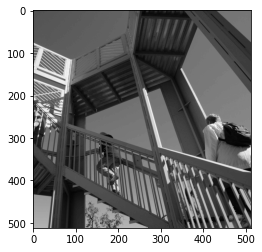

In [32]:
##Aqui podemos visualizar nossa imagem
plt.imshow(image, cmap = 'gray')

#Agora iremos criar nosso filtro que irá varer a imagem. Ele será 3x3. Os valores nos filtros podem variar, e eles são definidos muitas vezes por tentativa e erro. Existem valores que detectam linhas verticais melhores, outros que detectam linhas horizontais mais facilmente, e esse conhecimento fica dependente da experiência do programador.
##É importante salientar que a soma de todos os digitos dentro do filtro devem resultar em 0 ou 1!! Se eles resultarem em algo, por exemplo, 5, então devem ser normalizados através de uma variável peso posteriormente.

In [42]:
##Nosso filtro inicial
filter = [[-1, 0, -1], [2, 0, -2], [1, 0, 1]]

##O nosso peso para depois normalizarmos nosso filtro
weight = 1

#Iremos criar um copia da nosso imagem que será transformada, assim, teremos as duas imagens (antes e depois do filtro) para comparação.

In [43]:
image_filtered = np.copy(image)

##Iremos guardas as dimensões da imagem aqui
size_x = image_filtered.shape[0]
size_y = image_filtered.shape[1]

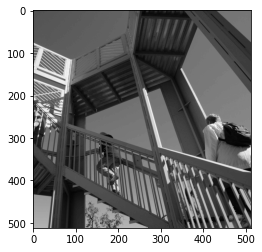

In [44]:
plt.imshow(image_filtered, cmap = 'gray')

In [45]:
##Esta interação faz o filtro varer por toda a imagem
for x in range(1, size_x - 1):

  for y in range(1, size_y - 1):

    convolution = 0.0

    convolution = convolution + (image[x - 1, y-1] * filter[0][0])
    convolution = convolution + (image[x, y-1] * filter[0][1])
    convolution = convolution + (image[x + 1, y-1] * filter[0][2])
    convolution = convolution + (image[x-1, y] * filter[1][0])
    convolution = convolution + (image[x, y] * filter[1][1])
    convolution = convolution + (image[x+1, y] * filter[1][2])
    convolution = convolution + (image[x-1, y+1] * filter[2][0])
    convolution = convolution + (image[x, y+1] * filter[2][1])
    convolution = convolution + (image[x+1, y+1] * filter[2][2])
    
    convolution = convolution * weight

    if(convolution<0):
       convolution=0

    if(convolution>255):
      convolution=255

    image_filtered[x, y] = convolution

#Agora podemos visualizar a imagem filtrada:

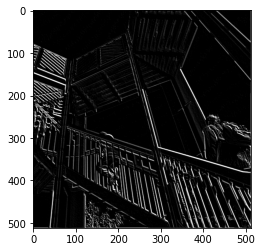

In [46]:
plt.imshow(image_filtered, cmap = 'gray')

#Agora nos criamos nosso Pooling. 

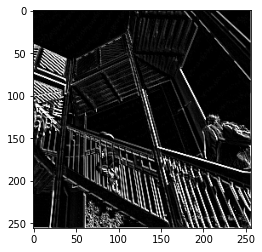

In [48]:
new_x = int(size_x/2)
new_y = int(size_y/2)
image_pooled = np.zeros((new_x, new_y))

for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):

    pixels = []
    pixels.append(image_filtered[x, y])
    pixels.append(image_filtered[x+1, y])
    pixels.append(image_filtered[x, y+1])
    pixels.append(image_filtered[x+1, y+1])
    image_pooled[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.imshow(image_pooled, cmap = 'gray')